In [2]:
####None Negative Poisson Regression####
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import numpy.matlib
import scipy.linalg
import itertools
import calendar
from datetime import datetime
from datetime import timedelta
from scipy import sparse
from scipy.stats import norm
from pandas.tools.plotting import scatter_matrix
from numpy.random import *
from scipy import optimize

(array([2.480e+02, 5.140e+02, 8.200e+02, 2.194e+03, 1.083e+03, 9.990e+02,
        9.490e+02, 1.338e+03, 4.300e+02, 3.510e+02, 4.940e+02, 1.540e+02,
        1.280e+02, 7.800e+01, 9.400e+01, 4.000e+01, 2.500e+01, 2.700e+01,
        8.000e+00, 6.000e+00, 6.000e+00, 6.000e+00, 2.000e+00, 2.000e+00,
        4.000e+00]),
 array([ 0.  ,  1.28,  2.56,  3.84,  5.12,  6.4 ,  7.68,  8.96, 10.24,
        11.52, 12.8 , 14.08, 15.36, 16.64, 17.92, 19.2 , 20.48, 21.76,
        23.04, 24.32, 25.6 , 26.88, 28.16, 29.44, 30.72, 32.  ]),
 <a list of 25 Patch objects>)

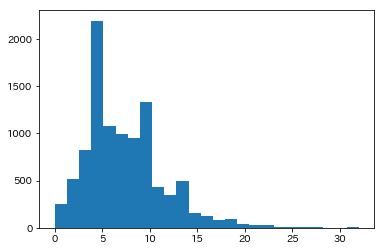

In [13]:
##データの生成
#データの設定
N = 10000
k = 10

#説明変数の生成
k1 = 3; k2 = 5; k3 = 5
x1 = np.random.gamma(0.5, 1/0.5, N*k1).reshape(N, k1)
x2 = np.zeros((N, k2))
for j in range(k2):
    prob = np.random.uniform(0.25, 0.55, 1)
    x2[:, j] = np.random.binomial(1, prob, N)
x3 = np.random.multinomial(1, np.random.dirichlet(np.repeat(3.0, k3), 1).reshape(k3), N)
x3 = np.delete(x3, np.argmin(np.sum(x3, axis=0)), axis=1)   #冗長な変数の削除
x = np.concatenate((np.repeat(1, N)[:, np.newaxis], x1, x2, x3), axis=1)
k = x.shape[1]

#応答変数の生成
beta = np.append(1.5, np.exp(np.random.normal(-0.25, 0.3, k-1)))
betat = beta.copy()
Lambda = np.dot(x, beta)
y = np.random.poisson(Lambda, N)
y_factorial = scipy.special.gammaln(y+1)
plt.hist(y, bins=25)

In [40]:
##最尤法でパラメータを推定
#モデルの対数尤度
def loglike(beta, y, y_factorial, x):
    #ポアソンモデルの対数尤度関数
    mu = np.dot(x, np.exp(beta))
    LL = np.sum(y * np.log(mu) - mu - y_factorial)
    return -LL

#モデルの対数尤度の勾配ベクトル
def dloglike(beta, y, y_factorial, x):
    #ポアソンモデルの勾配ベクトル
    mu = np.dot(x, np.exp(beta))
    LLd = np.sum(y[:, np.newaxis] * (x * np.exp(beta) / mu[:, np.newaxis]) - x*np.exp(beta), axis=0)
    return -LLd 

In [45]:
#準ニュートン法で対数尤度を最大化
beta = np.append(0.0, np.random.normal(-0.25, 0.25, k-1))
res = optimize.minimize(loglike, beta, jac=dloglike, method="BFGS", args=(y, y_factorial, x), options={"disp": True})
print(np.round(res.fun, 1))
print(np.round(np.exp(res.x), 3))
print(np.round(betat, 3))

         Current function value: 23514.176013
         Iterations: 42
         Function evaluations: 56
         Gradient evaluations: 55
23514.2
[1.646 1.683 0.888 0.897 0.781 0.968 0.582 0.763 0.836 0.605 0.278 0.809
 0.551]
[1.5   1.676 0.878 0.916 0.749 0.988 0.59  0.825 0.796 0.784 0.484 0.89
 0.615]
